💵 ACCIDENT SEVERITY PREDICTION
🙋‍♀️ Author:
Sonia Firdous

📄 Description:
This dataset is collected from Addis Ababa Sub-city police departments for
master's research work. The data set has been prepared from manual records of
road traffic accidents of the year 2017-20. All the sensitive information has been
excluded during data encoding and finally it has 32 features and 12316 instances
of the accident.


Dataset :

Rows: 12,316 accidents

Columns: 32 features

Target: Accident_severity (multi-class)


🎯Objective:
Build a Machine Learning classification model that predicts accident's severity.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv("/content/RTA Dataset.csv")

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.shape


(12316, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

Convert Time to datetime

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour
df['Time_of_day'] = pd.cut(
    df['Hour'],
    bins=[-1, 5, 11, 16, 20, 23],
    labels=['Late Night','Morning','Noon','Evening','Night']
)
df.drop('Time', axis=1, inplace=True)


In [ ]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Time_of_day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,Evening
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,Evening
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Evening
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Late Night
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,Late Night


In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Hour
count,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,13.835823
std,0.688790,1.007179,5.202923
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,10.000000
50%,2.000000,1.000000,15.000000
75%,2.000000,2.000000,18.000000
max,7.000000,8.000000,23.000000


In [ ]:
df.isnull().sum()

,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427


Missing Value Heatmap
Plot: Where missing values occur

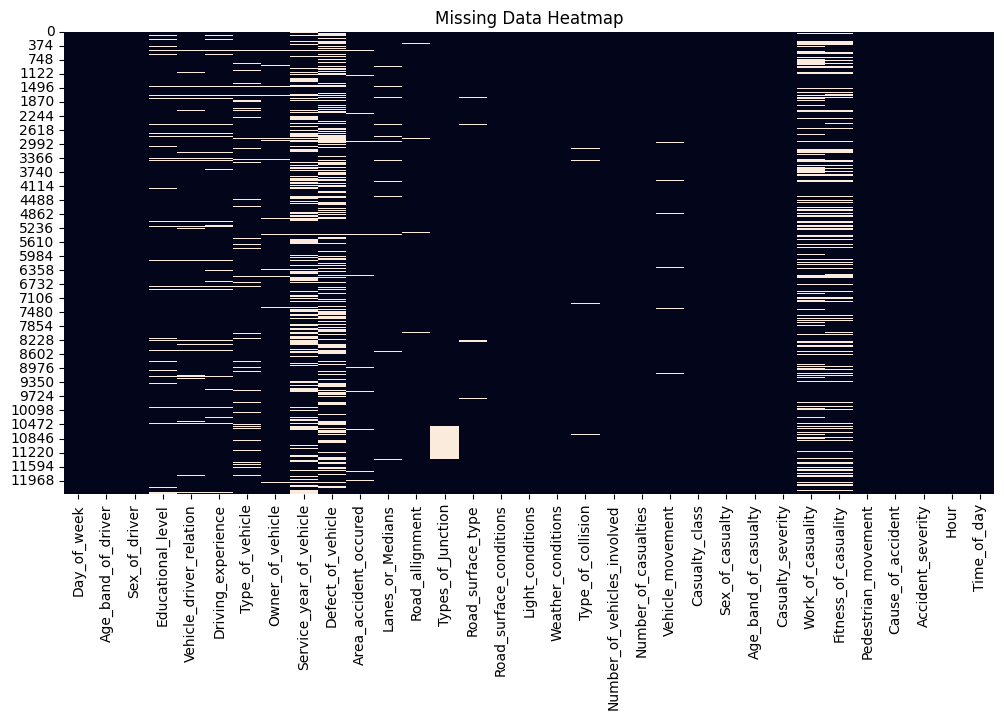

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
categorical = df.select_dtypes(include=['object']).columns
numeric = df.select_dtypes(include=['int64', 'float64']).columns

# Target

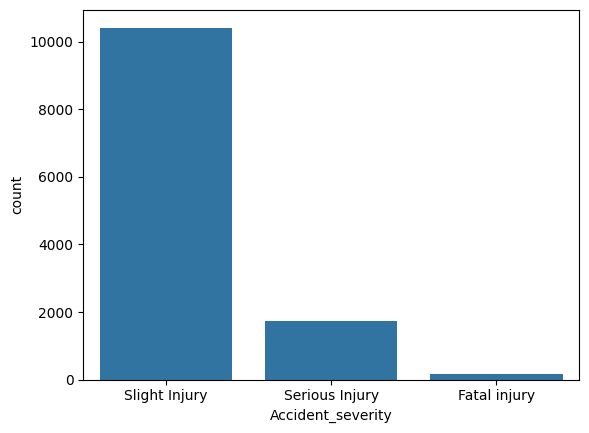

In [ ]:
sns.countplot(x=df['Accident_severity'])
plt.show()

In [ ]:
df["Accident_severity"].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


histplot for distibution---numerical columns

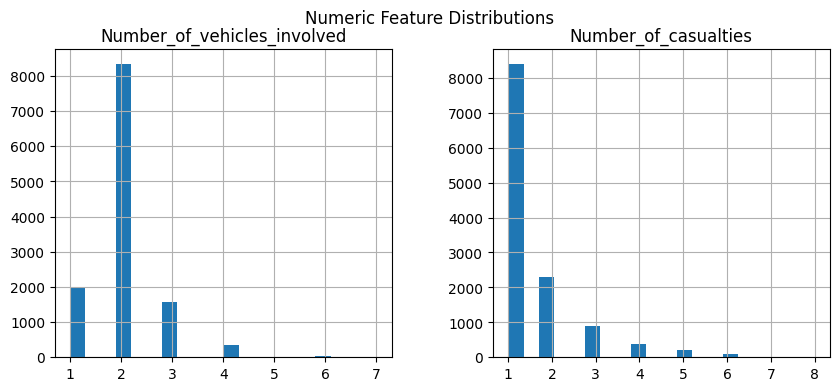

In [ ]:
df[['Number_of_vehicles_involved','Number_of_casualties']].hist(
    figsize=(10,4), bins=20
)
plt.suptitle("Numeric Feature Distributions")
plt.show()


## Accident Severity vs Numeric Features

Casualties vs Accident Severity

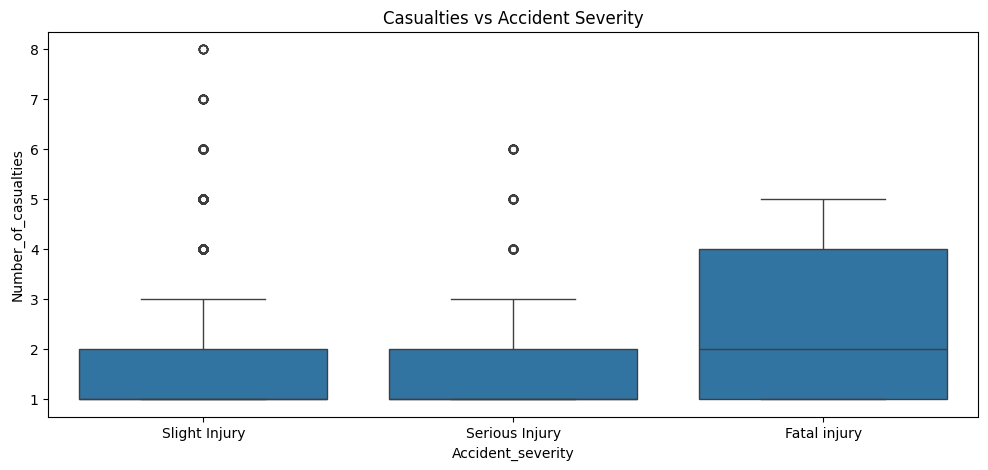

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Accident_severity', y='Number_of_casualties')
plt.title("Casualties vs Accident Severity")
plt.show()



Vehicles Involved vs Accident Severity

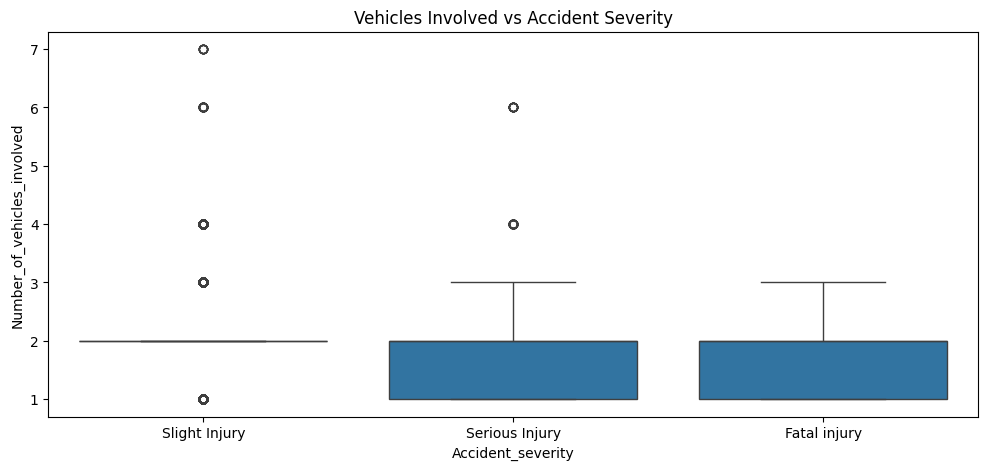

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Accident_severity', y='Number_of_vehicles_involved')
plt.title("Vehicles Involved vs Accident Severity")
plt.show()


## Categorical Variables vs Severity

Driver Sex vs Accident Severity

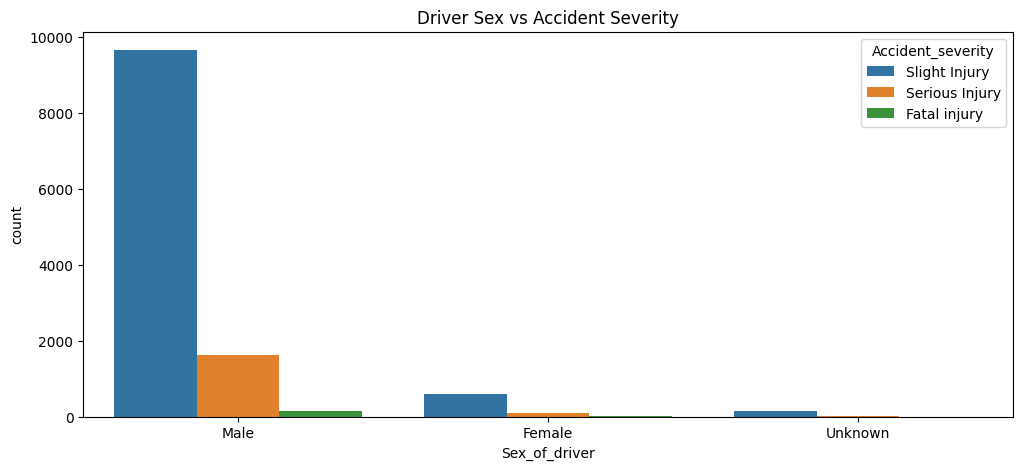

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Sex_of_driver', hue='Accident_severity')
plt.title("Driver Sex vs Accident Severity")
plt.show()

## Weather Conditions vs Accident Severity

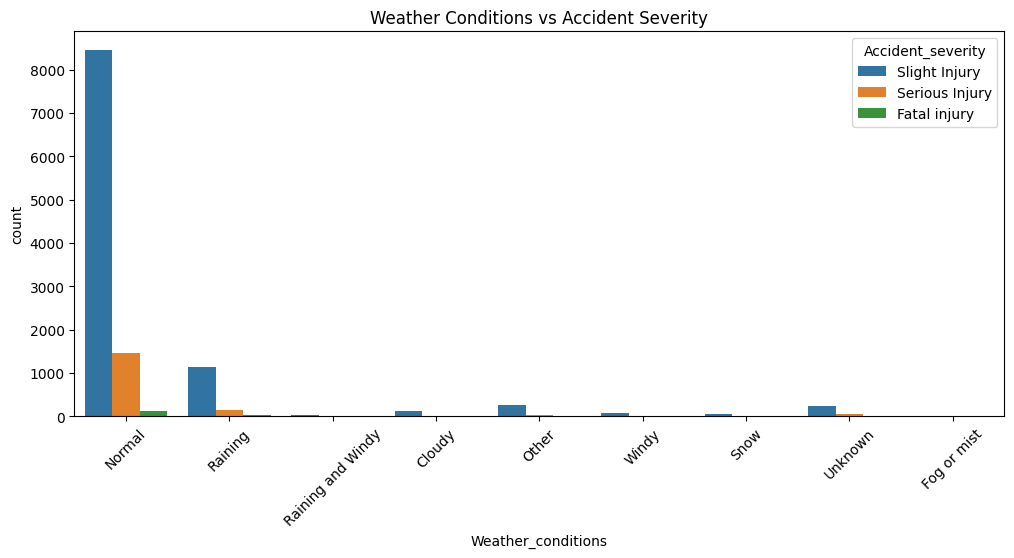

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity')
plt.title("Weather Conditions vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

##accident severity vs Age

In [ ]:
df["Age_band_of_driver"].value_counts()

,count
Age_band_of_driver,
18-30,4271
31-50,4087
Over 51,1585
Unknown,1548
Under 18,825


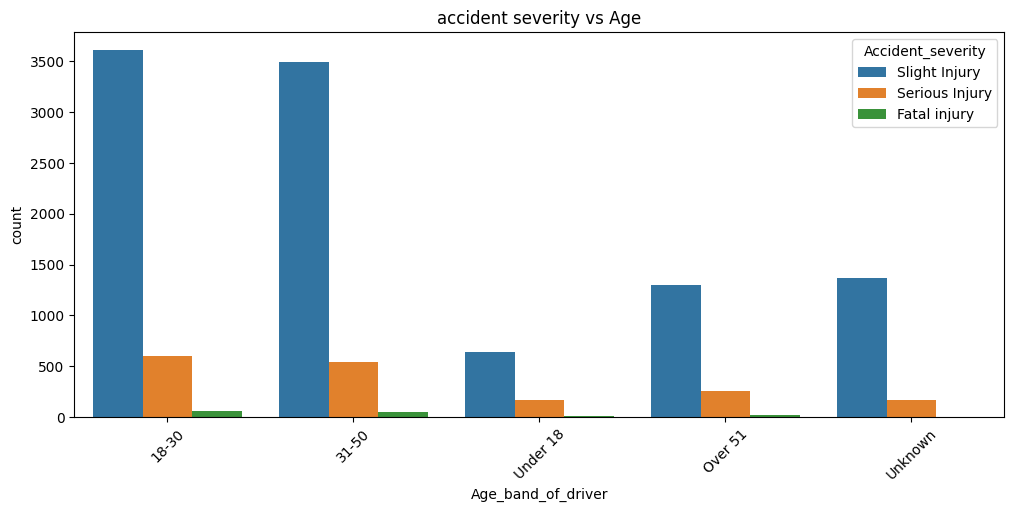

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Age_band_of_driver', hue='Accident_severity')
plt.title("accident severity vs Age")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Time_of_day'],
      dtype='object')


##Accident Serverity vs Vehicle driver relationship


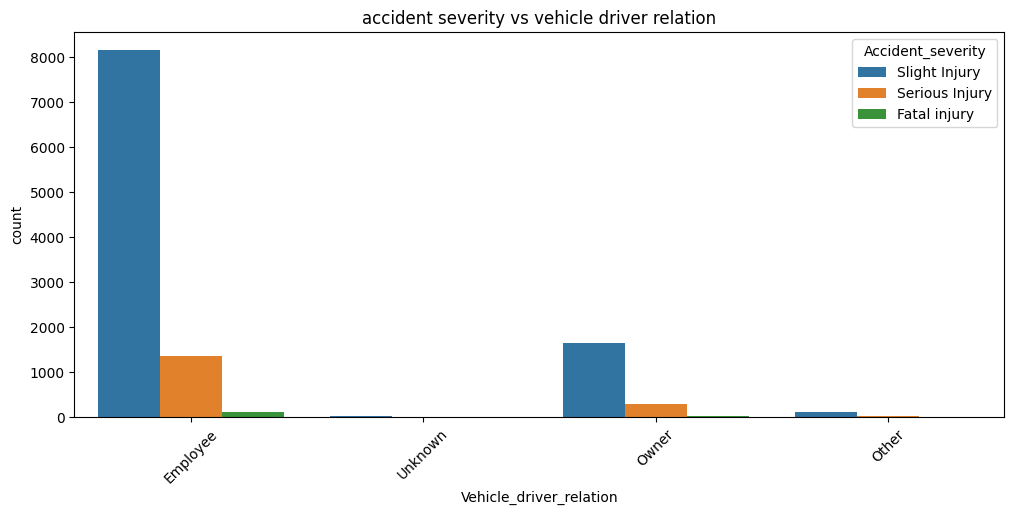

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Vehicle_driver_relation', hue='Accident_severity')
plt.title("accident severity vs vehicle driver relation")
plt.xticks(rotation=45)
plt.show()


##Accident Serverity vs drivereducation level

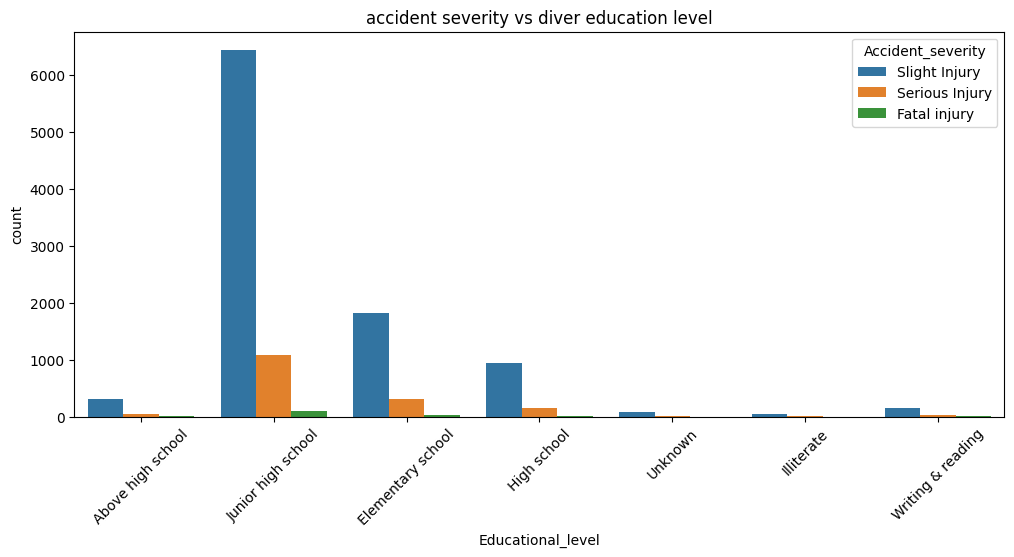

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Educational_level', hue='Accident_severity')
plt.title("accident severity vs diver education level")
plt.xticks(rotation=45)
plt.show()

##accident severity vs Driving experience

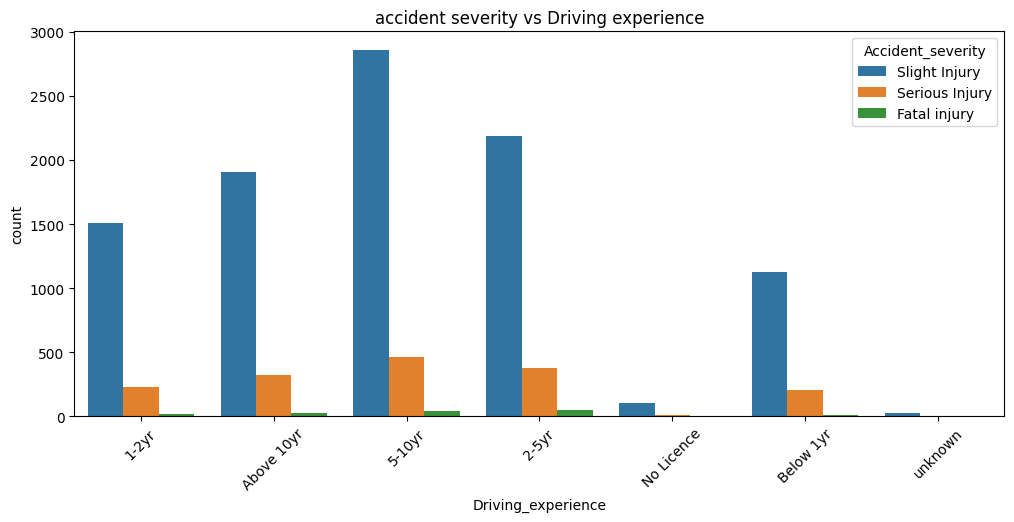

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Driving_experience', hue='Accident_severity')
plt.title("accident severity vs Driving experience")
plt.xticks(rotation=45)
plt.show()

Time of day vs severity

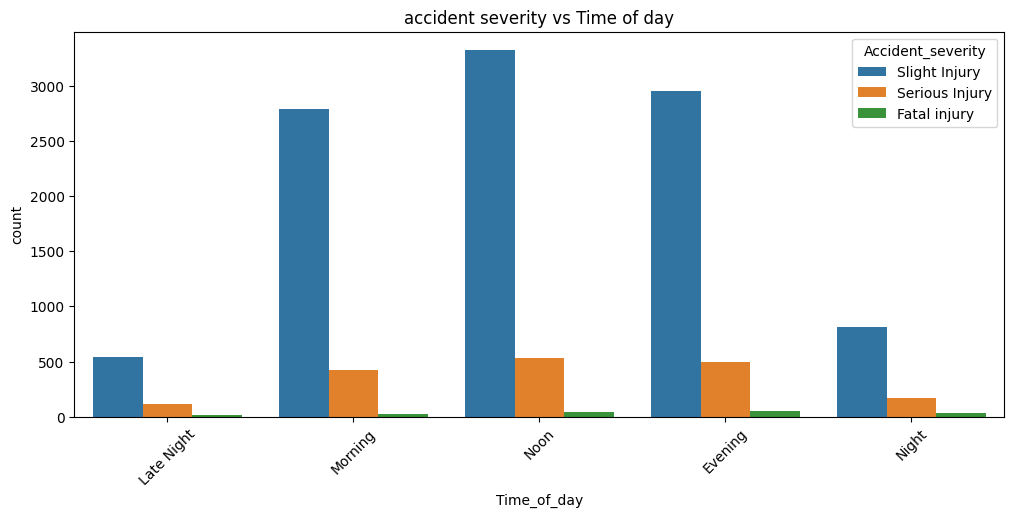

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Time_of_day', hue='Accident_severity')
plt.title("accident severity vs Time of day")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["Hour"].value_counts()

,count
Hour,
17,1228
18,956
16,921
15,874
8,828
13,772
19,708
12,691
14,639


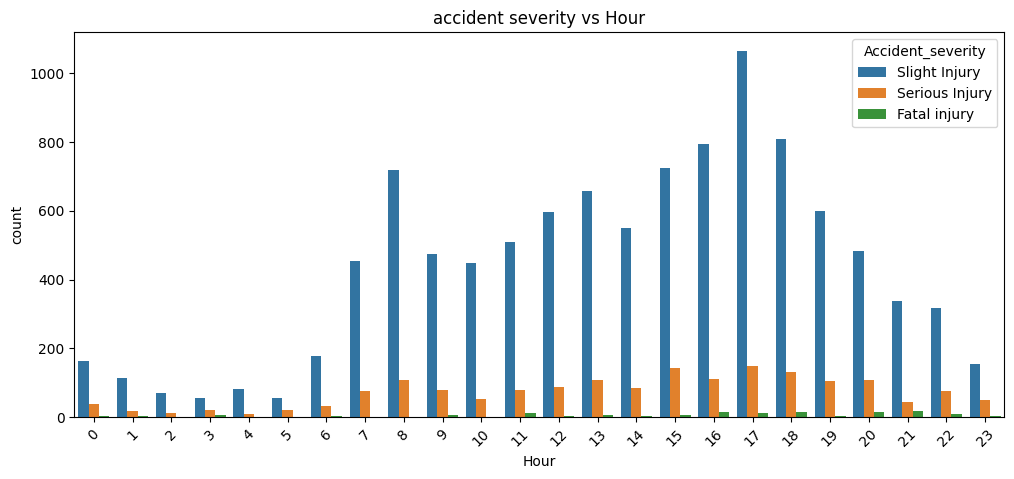

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Hour', hue='Accident_severity')
plt.title("accident severity vs Hour")
plt.xticks(rotation=45)
plt.show()

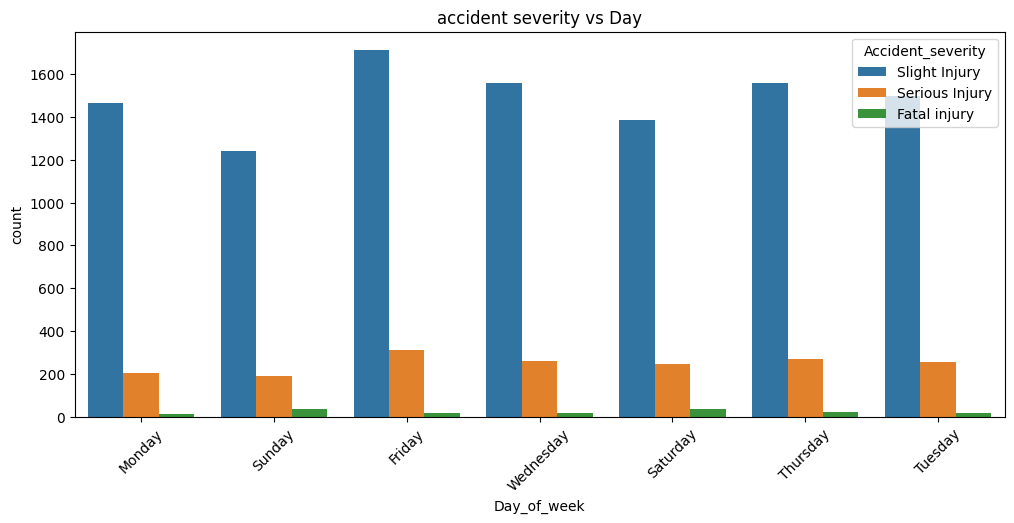

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Day_of_week', hue='Accident_severity')
plt.title("accident severity vs Day")
plt.xticks(rotation=45)
plt.show()

##Accident severity vs Private/Goverment

In [ ]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].str.strip().str.title()

df['Owner_of_vehicle'] = df['Owner_of_vehicle'].replace({
    'Owner': 'Private',
    'Governmental': 'Government'
})


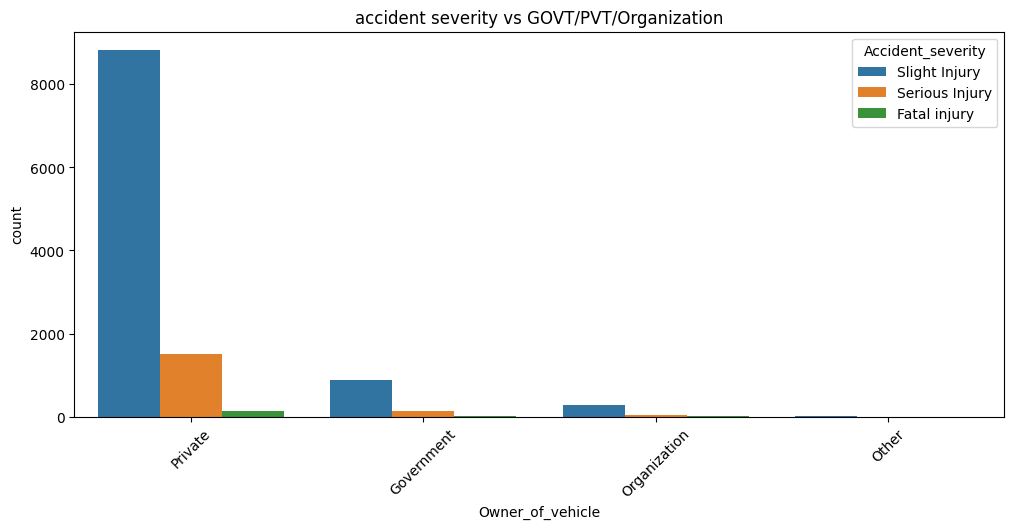

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Owner_of_vehicle', hue='Accident_severity')
plt.title("accident severity vs GOVT/PVT/Organization")
plt.xticks(rotation=45)
plt.show()

Correlation Plot (for numeric only)

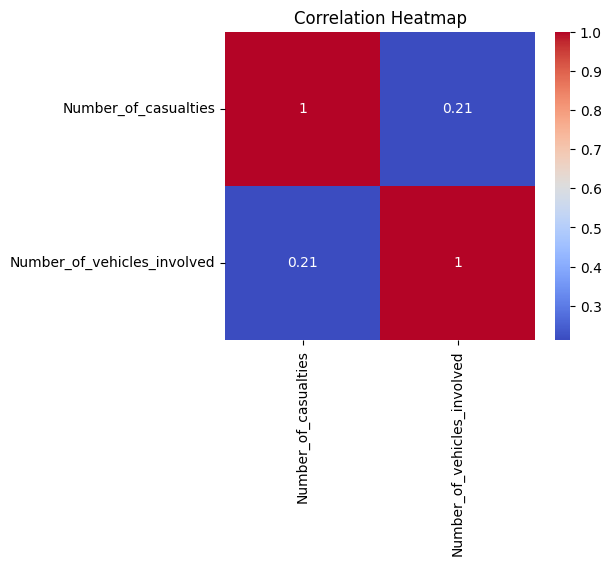

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['Number_of_casualties','Number_of_vehicles_involved']]
            .corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##Accident severity vs Road condition

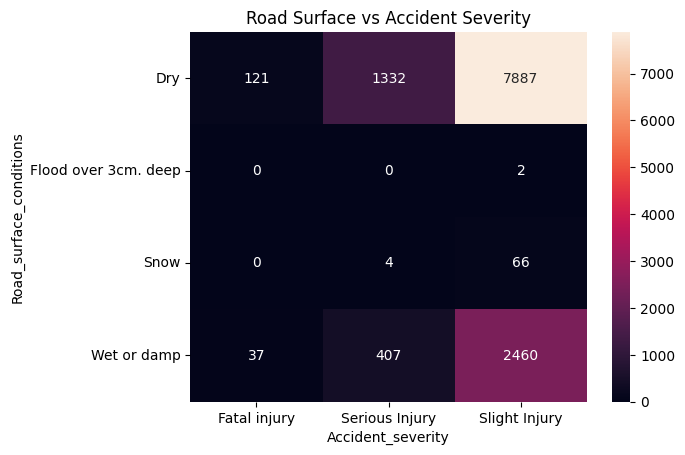

In [ ]:
cross = pd.crosstab(df['Road_surface_conditions'], df['Accident_severity'])
sns.heatmap(cross, annot=True, fmt='d')
plt.title("Road Surface vs Accident Severity")
plt.show()


In [ ]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **Pipeline**

numerical/categorical columns

In [ ]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# Remove the target from numerical columns/categorical columns
target = "Accident_severity"
numerical_cols = [c for c in numerical_cols if c != target]
categorical_cols = [c for c in categorical_cols if c != target]

#Pipeline preprocesing

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


Pipeline with SMOTE + RandomOversampler

# LOGISTIC REGRESSION

In [ ]:
LGR_Model = LogisticRegression(max_iter=2000,class_weight="balanced")

LGR_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),

    # Hybrid Oversampling
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("ros", RandomOverSampler(random_state=42)),

    ("classifier", LGR_Model)
])

In [ ]:
LGR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_out...
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('ros', RandomOverSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [ ]:
LGR_pred = LGR_pipeline.predict(X_test)

EVALUATE

In [ ]:
from sklearn.metrics import f1_score, classification_report

print("LOgistic Regression")
print("F1 Score:",round(f1_score(y_test, LGR_pred, average='weighted'),2))
print(classification_report(y_test, LGR_pred))

LOgistic Regression
F1 Score: 0.58
                precision    recall  f1-score   support

  Fatal injury       0.02      0.29      0.04        31
Serious Injury       0.16      0.40      0.23       349
 Slight Injury       0.87      0.51      0.64      2084

      accuracy                           0.49      2464
     macro avg       0.35      0.40      0.31      2464
  weighted avg       0.76      0.49      0.58      2464



# DECISION TREE

In [ ]:
DT_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),

    ("ros", RandomOverSampler(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42,class_weight="balanced"))
])

In [ ]:
DT_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_o...
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('ros', RandomOverSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
DT_y_pred=DT_model.predict(X_test)

In [ ]:
print("Evaluation summary")

print("Decision Tree:")
print("F1 score:", round(f1_score(y_test,DT_y_pred, average='weighted'), 2))
print(classification_report(y_test, DT_y_pred))

Evaluation summary
Decision Tree:
F1 score: 0.75
                precision    recall  f1-score   support

  Fatal injury       0.12      0.13      0.12        31
Serious Injury       0.19      0.20      0.20       349
 Slight Injury       0.86      0.85      0.85      2084

      accuracy                           0.75      2464
     macro avg       0.39      0.39      0.39      2464
  weighted avg       0.75      0.75      0.75      2464



# RANDOM FOREST

In [ ]:
RF_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),

    ("ros", RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state=42,n_estimators=300,class_weight="balanced"))
])

In [ ]:
RF_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_o...
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('ros', RandomOverSampler(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [ ]:
RF_y_pred=RF_model.predict(X_test)

In [ ]:
print("Evaluation summary")

print("Random Forest:")
print("F1 score:", round(f1_score(y_test,RF_y_pred, average='weighted'), 2))
print(classification_report(y_test, RF_y_pred))

Evaluation summary
Random Forest:
F1 score: 0.78
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       1.00      0.00      0.01       349
 Slight Injury       0.85      1.00      0.92      2084

      accuracy                           0.85      2464
     macro avg       0.62      0.33      0.31      2464
  weighted avg       0.86      0.85      0.78      2464



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# RANDOM FOREST FEATURE IMPORTANCE

In [ ]:
importances = RF_model.named_steps["model"].feature_importances_
final_features = preprocessor.get_feature_names_out()

RF_fi = pd.DataFrame({
    "Feature": final_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(RF_fi.head(20))

                                               Feature  Importance
1                            num__Number_of_casualties    0.056174
0                     num__Number_of_vehicles_involved    0.028551
29                       cat__Driving_experience_2-5yr    0.023213
72                    cat__Area_accident_occured_Other    0.019086
5                              cat__Day_of_week_Sunday    0.018963
95                  cat__Types_of_Junction_No junction    0.018349
61                cat__Service_year_of_vehicle_Unknown    0.017752
114                     cat__Light_conditions_Daylight    0.017415
35                     cat__Type_of_vehicle_Automobile    0.017387
82             cat__Lanes_or_Medians_Undivided Two way    0.017033
111        cat__Light_conditions_Darkness - lights lit    0.015880
9                        cat__Age_band_of_driver_18-30    0.015709
194             cat__Cause_of_accident_Moving Backward    0.015156
80   cat__Lanes_or_Medians_Two-way (divided with br...    0.01

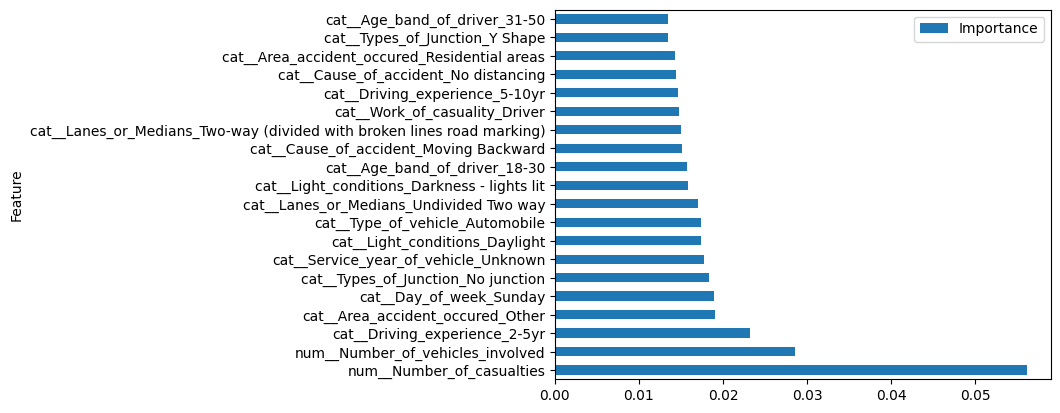

In [ ]:
# Plot feature importance

RF_fi.head(20).plot(kind='barh', x='Feature', y='Importance')
plt.show()


# XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [ ]:
XGB_model = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
        ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),

    ("resample", RandomOverSampler()),
    ("model", XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss'
    ))
])


In [ ]:
XGB_model.fit(X_train,y_train_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_o...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3, ...))])

In [ ]:
# extract resampled y from the resample step
resampled_y = XGB_model.named_steps["resample"].fit_resample(
    preprocessor.fit_transform(X_train), y_train
)[1]

print(pd.Series(resampled_y).value_counts())


Accident_severity
Slight Injury     8331
Serious Injury    8331
Fatal injury      8331
Name: count, dtype: int64


In [ ]:
y_pred = XGB_model.predict(X_test)


In [ ]:
print("Evaluation summary")

print("XGB:")
print("F1 score:", round(f1_score(y_test_enc,y_pred, average='weighted'), 2))
print(classification_report(y_test_enc, y_pred))

Evaluation summary
XGB:
F1 score: 0.79
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        31
           1       0.67      0.05      0.10       349
           2       0.85      1.00      0.92      2084

    accuracy                           0.85      2464
   macro avg       0.67      0.37      0.38      2464
weighted avg       0.82      0.85      0.79      2464



# XGBOOST FEATURE IMPORTANCE

In [ ]:
importances = XGB_model.named_steps["model"].feature_importances_
final_features = preprocessor.get_feature_names_out()

XGB_fi = pd.DataFrame({
    "Feature": final_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(XGB_fi.head(20))

                                          Feature  Importance
29                  cat__Driving_experience_2-5yr    0.028512
61           cat__Service_year_of_vehicle_Unknown    0.024858
1                       num__Number_of_casualties    0.023359
164                 cat__Work_of_casuality_Driver    0.023267
0                num__Number_of_vehicles_involved    0.022569
194        cat__Cause_of_accident_Moving Backward    0.019808
13                cat__Age_band_of_driver_Unknown    0.018550
82        cat__Lanes_or_Medians_Undivided Two way    0.017114
35                cat__Type_of_vehicle_Automobile    0.016666
139              cat__Vehicle_movement_Overtaking    0.016599
32              cat__Driving_experience_Below 1yr    0.015828
40           cat__Type_of_vehicle_Lorry (41?100Q)    0.015582
73   cat__Area_accident_occured_Residential areas    0.015165
195          cat__Cause_of_accident_No distancing    0.014283
134     cat__Vehicle_movement_Entering a junction    0.013845
154     

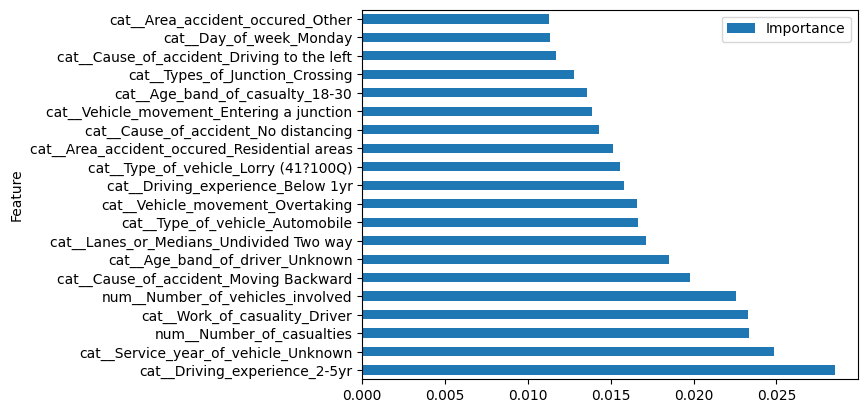

In [ ]:


XGB_fi.head(20).plot(kind='barh', x='Feature', y='Importance')
plt.show()


##LIGHT GB

In [ ]:
from lightgbm import LGBMClassifier
LGBM_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),

    ("ros", RandomOverSampler(random_state=42)),
    ('model', LGBMClassifier())])

In [ ]:
LGBM_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34969
[LightGBM] [Info] Number of data points in the train set: 24993, number of used features: 197
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_o...
                                                   'Weather_conditions',
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('ros', RandomOverSampler(random_state=42)),
                ('model', LGBMClassifier())])

In [ ]:
LGBM_y_pred=LGBM_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Evaluation summary")

print("LightGB:")
print("F1 score:", round(f1_score(y_test,LGBM_y_pred, average='weighted'), 2))
print(classification_report(y_test, LGBM_y_pred))

Evaluation summary
LightGB:
F1 score: 0.79
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       0.62      0.05      0.10       349
 Slight Injury       0.85      0.99      0.92      2084

      accuracy                           0.85      2464
     macro avg       0.49      0.35      0.34      2464
  weighted avg       0.81      0.85      0.79      2464



In [ ]:
# 1. Get feature importances
importances = LGBM_model.named_steps["model"].feature_importances_

# 2. Get final transformed feature names
final_features = preprocessor.get_feature_names_out()

# 3. Create importance DataFrame
LGBM_fi = pd.DataFrame({
    "Feature": final_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 4. Show top features
print(LGBM_fi.head(20))


                                               Feature  Importance
1                            num__Number_of_casualties         461
0                     num__Number_of_vehicles_involved         380
61                cat__Service_year_of_vehicle_Unknown         167
6                            cat__Day_of_week_Thursday         154
4                            cat__Day_of_week_Saturday         137
95                  cat__Types_of_Junction_No junction         133
9                        cat__Age_band_of_driver_18-30         129
101                     cat__Types_of_Junction_Y Shape         127
195               cat__Cause_of_accident_No distancing         123
111        cat__Light_conditions_Darkness - lights lit         122
2                              cat__Day_of_week_Friday         120
82             cat__Lanes_or_Medians_Undivided Two way         118
136               cat__Vehicle_movement_Going straight         117
11                     cat__Age_band_of_driver_Over 51        

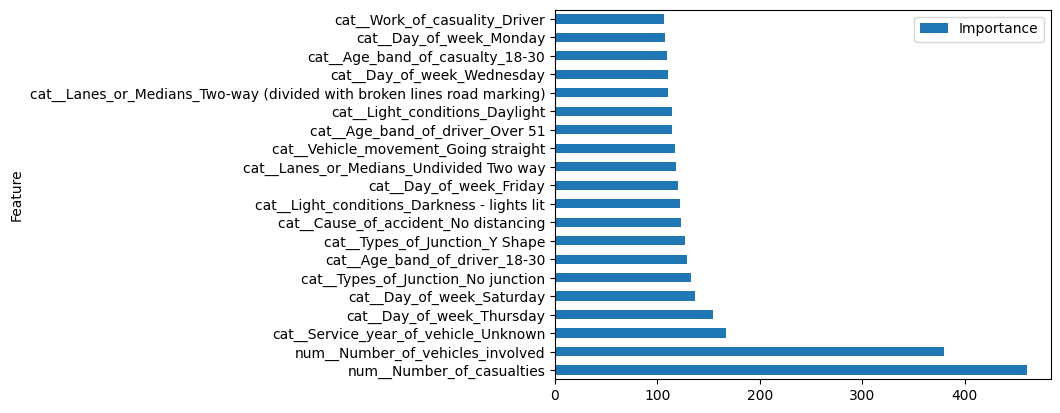

In [ ]:
import matplotlib.pyplot as plt

LGBM_fi.head(20).plot(kind='barh', x='Feature', y='Importance')
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
KNN_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),

    ("ros", RandomOverSampler(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=7))])

In [ ]:
KNN_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_o...
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('ros', RandomOverSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=7))])

In [ ]:

KNN_y_pred=KNN_model.predict(X_test)

In [ ]:
print("KNN Classifier")
print("F1 score:", round(f1_score(y_test,KNN_y_pred, average='weighted'), 2))
print(classification_report(y_test, KNN_y_pred))

KNN Classifier
F1 score: 0.31
                precision    recall  f1-score   support

  Fatal injury       0.03      0.48      0.06        31
Serious Injury       0.16      0.68      0.26       349
 Slight Injury       0.89      0.20      0.32      2084

      accuracy                           0.27      2464
     macro avg       0.36      0.46      0.21      2464
  weighted avg       0.78      0.27      0.31      2464



# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
NB_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),

    ("ros", RandomOverSampler(random_state=42)),
    ('model', GaussianNB())])

In [ ]:
NB_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_o...
                                                   'Weather_conditions',
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('ros', RandomOverSampler(random_state=42)),
                ('model', GaussianNB())])

In [ ]:
NB_y_pred=NB_model.predict(X_test)

In [ ]:
print("NAIVE BAYES")
print("F1 score:", round(f1_score(y_test,NB_y_pred, average='weighted'), 2))
print(classification_report(y_test, NB_y_pred))

NAIVE BAYES
F1 score: 0.21
                precision    recall  f1-score   support

  Fatal injury       0.01      0.87      0.03        31
Serious Injury       0.16      0.12      0.14       349
 Slight Injury       0.86      0.13      0.23      2084

      accuracy                           0.14      2464
     macro avg       0.35      0.37      0.13      2464
  weighted avg       0.75      0.14      0.21      2464



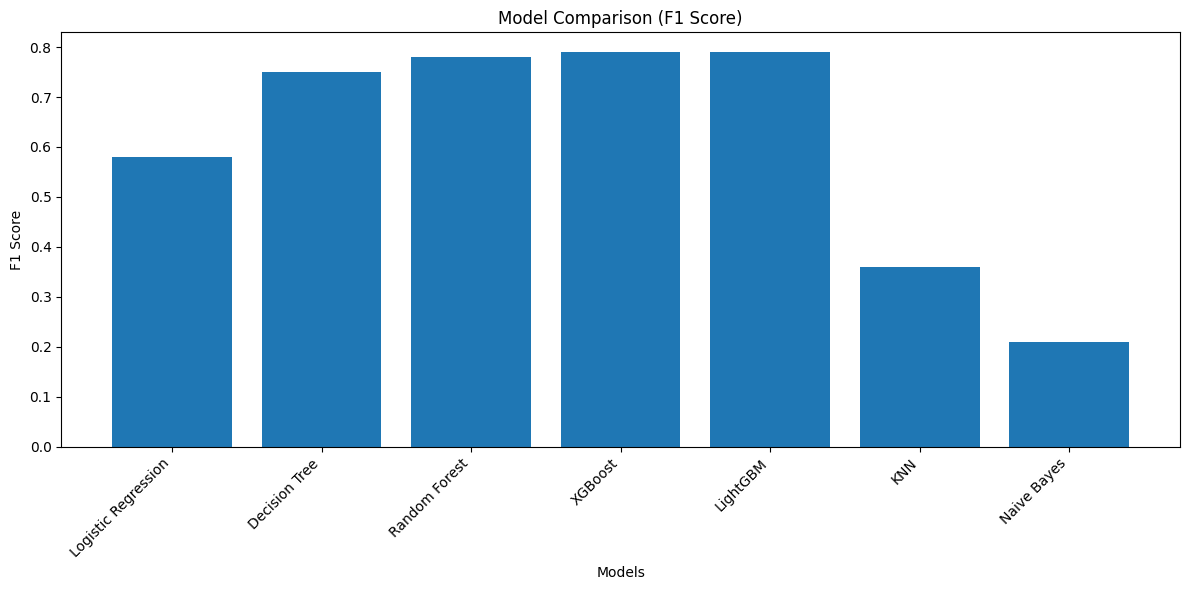

In [ ]:
f1_scores = {
    'Logistic Regression':0.58,
    'Decision Tree':0.75 ,
    'Random Forest':0.78,
    'XGBoost':0.79 ,
    'LightGBM': 0.79,
    'KNN':0.36 ,
    'Naive Bayes': 0.21
}

models = list(f1_scores.keys())
scores = list(f1_scores.values())

plt.figure(figsize=(12,6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model Comparison (F1 Score)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ROC SCORE

In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba_xgb = XGB_model.predict_proba(X_test)
pred_proba_lgbm = LGBM_model.predict_proba(X_test)

roc_xgb = roc_auc_score(y_test, pred_proba_xgb, multi_class='ovr')
roc_lgbm = roc_auc_score(y_test, pred_proba_lgbm, multi_class='ovr')

print("XGB ROC-AUC:", roc_xgb)
print("LGBM ROC-AUC:", roc_lgbm)


XGB ROC-AUC: 0.674326408836046
LGBM ROC-AUC: 0.6930665306290793


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# SAVE THE BEST MODEL

In [ ]:
import pickle
# Save the entire pipeline
with open('accident_severity_pipeline.pkl', 'wb') as f:
    pickle.dump(LGBM_model, f)

print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
# Load the saved pipeline
with open('accident_severity_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions on new data
# y_pred = loaded_model.predict(X_new)

# 📝 Conclusion

In this project, we built a multi-class accident severity prediction model using a dataset with categorical and numerical features. The key steps and findings are summarized as follows:

Data Preprocessing & Feature Engineering

Converted the Time column to datetime and extracted the hour.

Created a Time_of_day feature (Morning, Noon, Evening, Night) to capture temporal patterns.

Separated features into numerical and categorical types.

Pipeline Setup

SimpleImputer: median strategy for numerical features, most frequent for categorical features.

Encoding: One-hot encoding for categorical variables.

Scaling: StandardScaler applied to numerical features.

Data Balancing: Combined SMOTE + RandomOverSampler to handle severe class imbalance.

Model Training & Evaluation

Trained multiple classifiers: Logistic Regression, Decision Tree, Random Forest, XGBoost, LightGBM, KNN, Naive Bayes.

Evaluated performance using weighted F1-score and ROC-AUC.

Feature Importance Analysis

Extracted top features for tree-based models (Random Forest, XGBoost, LightGBM).

Most influential features included: driver experience, number of casualties, vehicle service years, accident cause, and road type.

Results

XGBoost and LightGBM achieved the highest F1-score (0.79) among all models.

Comparing ROC-AUC:

XGBoost: 0.674

LightGBM: 0.693

Based on both F1-score and ROC-AUC, LightGBM was selected as the best model for predicting accident severity.

# DATA STORY:

The analysis of accident severity shows that the most influential factors are the number of casualties and vehicles involved, followed by vehicle-related factors such as service year, driver characteristics like age band, and environmental/road conditions including day of the week, junction type, lanes, and light conditions. Using tree-based models (Random Forest, XGBoost, LightGBM), we found that LightGBM achieved the best performance, with the highest combination of F1-score and ROC-AUC, effectively capturing complex interactions between features. This indicates that accident severity is driven by a combination of human, vehicle, and environmental factors, and that boosted tree models are well-suited for modeling such multi-class, imbalanced datasets.